Solve a basic 1D heat conduction problem with a constant thermal conductivity, using explicit finite difference method.

 Parameters:
 
        length (float): Length of the material in meters.
        time (float): Total simulation time in seconds.
        thermal_conductivity (float): Thermal conductivity of the material.
        initial_temperature (float): Initial temperature of the material.
        boundary_temperature (float): Temperature at both boundaries.

    Returns:
        time_values (numpy.ndarray): Time values.
        temperature_profile (numpy.ndarray): Temperature profile at different time steps.
        

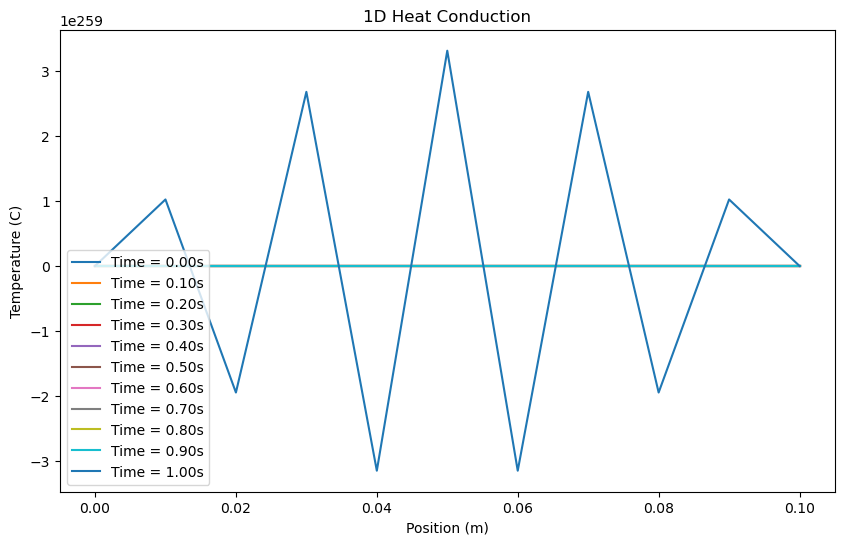

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def heat_conduction_1d(length, time, thermal_conductivity, initial_temperature, boundary_temperature):
    
    # Spatial and temporal step sizes
    dx = 0.01  # Spatial step size
    dt = 0.01  # Time step size

    # Number of spatial points and time steps
    num_points = int(length / dx) + 1
    num_steps = int(time / dt) + 1

    # Calculate the thermal diffusivity
    alpha = thermal_conductivity * dt / (dx ** 2)

    # Initialize temperature profile array
    temperature_profile = np.zeros((num_steps, num_points))
    time_values = np.linspace(0, time, num_steps)

    # Initial condition
    temperature_profile[0, :] = initial_temperature

    # Boundary conditions
    temperature_profile[:, 0] = boundary_temperature
    temperature_profile[:, -1] = boundary_temperature

    # Explicit finite difference method
    for i in range(1, num_steps):
        for j in range(1, num_points - 1):
            # Update temperature using the finite difference equation
            temperature_profile[i, j] = temperature_profile[i - 1, j] + \
                alpha * (temperature_profile[i - 1, j - 1] - 2 * temperature_profile[i - 1, j] +
                         temperature_profile[i - 1, j + 1])

    return time_values, temperature_profile

def plot_temperature_evolution(time_values, temperature_profile):
    """
    Plot the evolution of temperature over time.

    Parameters:
        time_values (numpy.ndarray): Time values.
        temperature_profile (numpy.ndarray): Temperature profile at different time steps.
    """
    plt.figure(figsize=(10, 6))
    plt.title('1D Heat Conduction')
    plt.xlabel('Position (m)')
    plt.ylabel('Temperature (C)')
    
    # Plot temperature profiles at different time steps
    for i in range(0, len(time_values), len(time_values)//10):
        plt.plot(np.linspace(0, length, len(temperature_profile[i, :])),
                 temperature_profile[i, :], label=f'Time = {time_values[i]:.2f}s')
    
    plt.legend()
    plt.show()

# Example usage
length = 0.1  # Length of the material (meters)
time = 1.0    # Total simulation time (seconds)
thermal_conductivity = 1.0  # Thermal conductivity (W/(m*K))
initial_temperature = 100.0  # Initial temperature (Celsius)
boundary_temperature = 0.0   # Temperature at boundaries (Celsius)

time_values, temperature_profile = heat_conduction_1d(length, time, thermal_conductivity,
                                                     initial_temperature, boundary_temperature)

plot_temperature_evolution(time_values, temperature_profile)